In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
#  pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call. NEVER SAVE API KEY IN PLAIN TEXT OR IN OUTPUT
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
# use the enumerate() method to get the index of the city for logging purposes and the city name for creating an endpoint URL
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # % = if i is divisble by 50
    if (i % 50 == 0 and i >= 50):
        # += add variable and then define variable as new value.
        set_count += 1
        record_count = 1
    # Replace the spaces in the city name with plus sign so that the url reads all the words in the city name.
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coquimbo
Processing Record 2 of Set 1 | katakwi
Processing Record 3 of Set 1 | komsomolskiy
Processing Record 4 of Set 1 | constitucion
Processing Record 5 of Set 1 | kasongo
Processing Record 6 of Set 1 | mehamn
Processing Record 7 of Set 1 | menzelinsk
Processing Record 8 of Set 1 | puerto escondido
Processing Record 9 of Set 1 | mahina
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | kysyl-syr
Processing Record 12 of Set 1 | suclayin
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | uruzgan
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | marzuq
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 | novoagansk
Processing Record 21 of Set 1 | mount gambier
Proces

Processing Record 38 of Set 4 | macouria
Processing Record 39 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 40 of Set 4 | alexandria
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | zhigansk
Processing Record 44 of Set 4 | trelew
Processing Record 45 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 46 of Set 4 | new norfolk
Processing Record 47 of Set 4 | wamba
Processing Record 48 of Set 4 | penzance
Processing Record 49 of Set 4 | hami
Processing Record 50 of Set 4 | saint john
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | bucerias
Processing Record 3 of Set 5 | buenos aires
Processing Record 4 of Set 5 | kargopol
Processing Record 5 of Set 5 | solsvik
City not found. Skipping...
Processing Record 6 of Set 5 | alta floresta
Processing Record 7 of Set 5 | mrirt
City not found. Skipping...
Processing Record 8 of Set 5 | olinda
Processing Record 9 of Se

Processing Record 26 of Set 8 | ardakan
Processing Record 27 of Set 8 | shubarkuduk
Processing Record 28 of Set 8 | maputo
Processing Record 29 of Set 8 | dhidhdhoo
Processing Record 30 of Set 8 | souillac
Processing Record 31 of Set 8 | bury saint edmunds
City not found. Skipping...
Processing Record 32 of Set 8 | bahia blanca
Processing Record 33 of Set 8 | tsogni
Processing Record 34 of Set 8 | sardinia
Processing Record 35 of Set 8 | lowestoft
Processing Record 36 of Set 8 | banepa
Processing Record 37 of Set 8 | vila franca do campo
Processing Record 38 of Set 8 | manbij
Processing Record 39 of Set 8 | fairbanks
Processing Record 40 of Set 8 | touros
Processing Record 41 of Set 8 | nagod
Processing Record 42 of Set 8 | sao filipe
Processing Record 43 of Set 8 | ixtapa
Processing Record 44 of Set 8 | nortelandia
Processing Record 45 of Set 8 | luwuk
Processing Record 46 of Set 8 | mersing
Processing Record 47 of Set 8 | nador
Processing Record 48 of Set 8 | mineiros
Processing Reco

Processing Record 11 of Set 12 | huilong
Processing Record 12 of Set 12 | forchheim
Processing Record 13 of Set 12 | grasten
Processing Record 14 of Set 12 | fakel
Processing Record 15 of Set 12 | teknaf
Processing Record 16 of Set 12 | comodoro rivadavia
Processing Record 17 of Set 12 | ostrovnoy
Processing Record 18 of Set 12 | batemans bay
Processing Record 19 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 20 of Set 12 | launceston
Processing Record 21 of Set 12 | kaliganj
Processing Record 22 of Set 12 | yushala
Processing Record 23 of Set 12 | napasar
Processing Record 24 of Set 12 | mount isa
Processing Record 25 of Set 12 | floro
Processing Record 26 of Set 12 | eskasem
City not found. Skipping...
Processing Record 27 of Set 12 | vostok
Processing Record 28 of Set 12 | giresun
Processing Record 29 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 30 of Set 12 | labuhan
Processing Record 31 of Set 12 | shelton
Processing Record 32 of Set 12

In [28]:
len(city_data)

581

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
# creating a dataframe from a list of dictionaries works if  the dictionarys have the same keys.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,56.93,94,90,4.05,CL,2021-06-05 02:29:17
1,Katakwi,1.8911,33.9661,63.14,94,40,1.86,UG,2021-06-05 02:29:18
2,Komsomolskiy,40.4272,71.7189,81.32,29,0,6.91,UZ,2021-06-05 02:29:18
3,Constitucion,-35.3333,-72.4167,53.11,88,98,10.27,CL,2021-06-05 02:28:59
4,Kasongo,-4.4500,26.6667,69.75,67,69,0.83,CD,2021-06-05 02:29:18
5,Mehamn,71.0357,27.8492,44.02,90,100,18.77,NO,2021-06-05 02:29:19
6,Menzelinsk,55.7271,53.1026,52.84,71,0,6.93,RU,2021-06-05 02:29:19
7,Puerto Escondido,15.8500,-97.0667,85.03,70,40,0.00,MX,2021-06-05 02:29:19
8,Mahina,-17.5065,-149.4890,83.97,70,75,12.37,PF,2021-06-05 02:29:20
9,Kysyl-Syr,63.8986,122.7617,72.18,43,100,12.24,RU,2021-06-05 02:29:20


In [23]:
nco = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [24]:
city_data_df = city_data_df[nco]

In [25]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coquimbo,CL,2021-06-05 02:29:17,-29.9533,-71.3436,56.93,94,90,4.05
1,Katakwi,UG,2021-06-05 02:29:18,1.8911,33.9661,63.14,94,40,1.86
2,Komsomolskiy,UZ,2021-06-05 02:29:18,40.4272,71.7189,81.32,29,0,6.91
3,Constitucion,CL,2021-06-05 02:28:59,-35.3333,-72.4167,53.11,88,98,10.27
4,Kasongo,CD,2021-06-05 02:29:18,-4.4500,26.6667,69.75,67,69,0.83
...,...,...,...,...,...,...,...,...,...
576,Halifax,CA,2021-06-05 02:31:11,44.6453,-63.5724,64.42,97,100,1.99
577,Severo-Kurilsk,RU,2021-06-05 02:32:35,50.6789,156.1250,44.20,89,100,16.96
578,Prince George,CA,2021-06-05 02:30:11,53.9166,-122.7530,53.29,83,90,9.22
579,Ngunguru,NZ,2021-06-05 02:32:35,-35.6167,174.5000,64.17,63,100,15.12


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

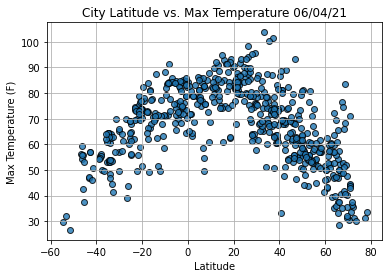

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

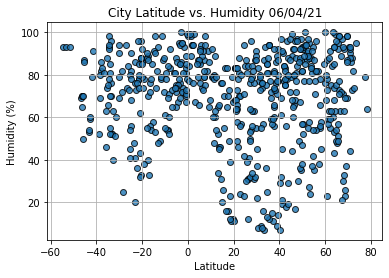

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

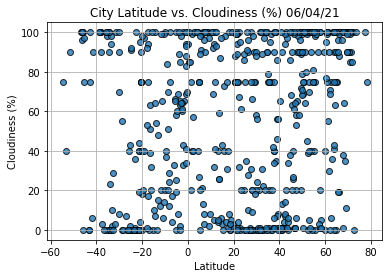

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

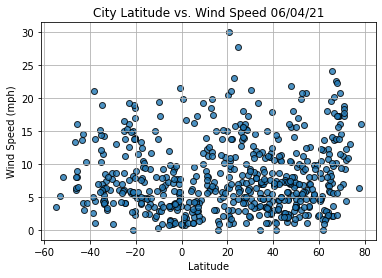

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
# This function will not plot until we call the defined value with all the tupled variables.

In [40]:
index13 = city_data_df.loc[13]

In [41]:
index13

City                     Cidreira
Country                        BR
Date          2021-06-05 02:29:21
Lat                      -30.1811
Lng                      -50.2056
Max Temp                    65.37
Humidity                       90
Cloudiness                     70
Wind Speed                   8.68
Name: 13, dtype: object

In [42]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
576     True
577     True
578     True
579    False
580     True
Name: Lat, Length: 581, dtype: bool

In [43]:
# Loc method combined with criteria
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Katakwi,UG,2021-06-05 02:29:18,1.8911,33.9661,63.14,94,40,1.86
2,Komsomolskiy,UZ,2021-06-05 02:29:18,40.4272,71.7189,81.32,29,0,6.91
5,Mehamn,NO,2021-06-05 02:29:19,71.0357,27.8492,44.02,90,100,18.77
6,Menzelinsk,RU,2021-06-05 02:29:19,55.7271,53.1026,52.84,71,0,6.93
7,Puerto Escondido,MX,2021-06-05 02:29:19,15.8500,-97.0667,85.03,70,40,0.00
...,...,...,...,...,...,...,...,...,...
575,Adre,TD,2021-06-05 02:32:35,13.4667,22.2000,78.98,45,59,6.62
576,Halifax,CA,2021-06-05 02:31:11,44.6453,-63.5724,64.42,97,100,1.99
577,Severo-Kurilsk,RU,2021-06-05 02:32:35,50.6789,156.1250,44.20,89,100,16.96
578,Prince George,CA,2021-06-05 02:30:11,53.9166,-122.7530,53.29,83,90,9.22


In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Katakwi,UG,2021-06-05 02:29:18,1.8911,33.9661,63.14,94,40,1.86
2,Komsomolskiy,UZ,2021-06-05 02:29:18,40.4272,71.7189,81.32,29,0,6.91
5,Mehamn,NO,2021-06-05 02:29:19,71.0357,27.8492,44.02,90,100,18.77
6,Menzelinsk,RU,2021-06-05 02:29:19,55.7271,53.1026,52.84,71,0,6.93
7,Puerto Escondido,MX,2021-06-05 02:29:19,15.8500,-97.0667,85.03,70,40,0.00


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

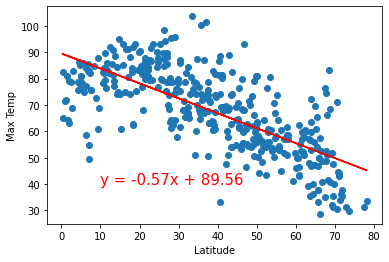

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function. that was defined as a complete function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

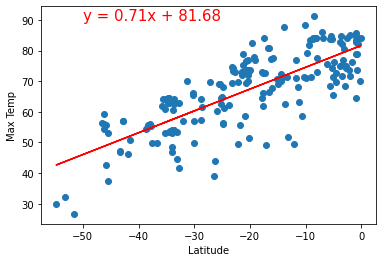

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

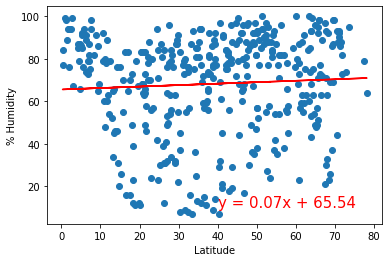

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

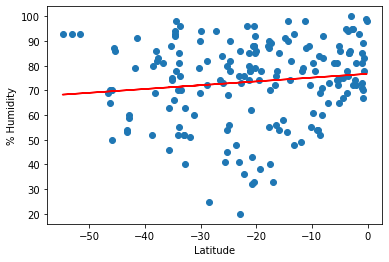

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [51]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

LinregressResult(slope=0.15356658892369174, intercept=76.69954247219178, rvalue=0.12577034668606885, pvalue=0.09159378342327072, stderr=0.09053773663450596, intercept_stderr=2.244204370750992)

In [52]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

LinregressResult(slope=0.06861738503504368, intercept=65.54283037340974, rvalue=0.0570746010831841, pvalue=0.2547664541013818, stderr=0.06016462701013603, intercept_stderr=2.613665040859131)

In [ ]:
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the
# Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to
# changing weather patterns that can increase or decrease percent humidity.

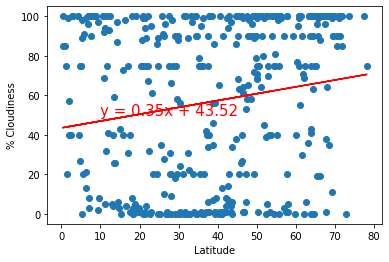

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % CLoudiness', '% Cloudiness',(10,50))

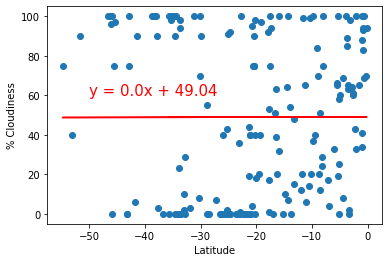

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

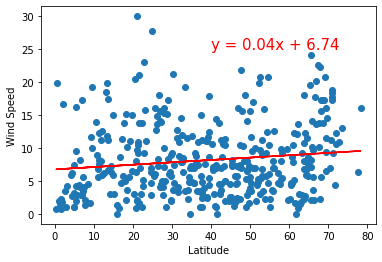

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

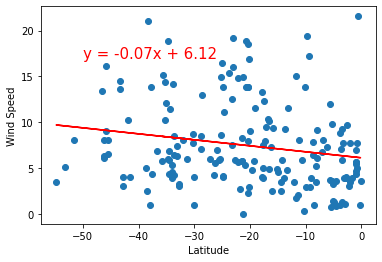

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,17))